In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import ndimage

path = '/media/robert/Data_Storage/Data/Experimental/Stark_Broadening/6-5-19_Spectrometer/'

In [2]:
dataset = '1906050014'
spectrum = np.load(path+dataset+'/michaelito_'+dataset+'_0000.npy').item()
l = spectrum['lambda']
N = len(l)

In [3]:
def integrate_dataset(dataset):
    file = path + str(dataset) + '/michaelito_' + str(dataset) + '_'
    I = np.zeros(N, dtype='double')
    for i in range(100):
        filename = file + '%04d.npy' % i
        I += np.load(filename).item()['I']
    return I

In [4]:
def plot_spectrum(*args, xlim=None, ylim=None, lines=None, title=None):
    if xlim is None:
        xlim = (l[0], l[-1])
    plt.figure(figsize=(8, 2), dpi=150)
    ax = plt.subplot()
    peak = 0
    colors = [plt.cm.brg(i) for i in np.linspace(0, 1, len(args))]
    ax.set_prop_cycle('color', colors)
    for arg in args:
        plt.plot(l, arg, linewidth=0.2)
        amax = np.amax(arg)
        if amax > peak:
            peak = amax
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('Counts')
    plt.xlim(xlim)
    if ylim is None:
        ylim = (-1000, 1.05*peak)
    plt.ylim(ylim)
    if lines is not None:
        for i in range(len(lines)):
            line = lines[i]
            plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2)
    if title is not None:
        plt.title(title)
    plt.show()

In [5]:
def adjust(data, background, start, end):
    data_adjusted = data - background
    data_adjusted -= np.average(data_adjusted[start:end])
    return data_adjusted

In [6]:
# Helium lines with intensity greater than 100
lines = np.array([3888.6456, 3888.6489, 4471.479, 4921.931, 5015.678, 5875.6148, 5875.6404, 5875.9663, 6678.1517,
                  7065.1771, 10829.0911, 10830.2501, 10830.3398])
lines = lines/10
# Singly ionized Helium lines
lines2 = np.array([4685.7038, 4685.7044, 6560.10])
lines2 = lines2/10

lines_c = np.append(lines, lines2)
# Weaker lines we have also been able to identify
lines_w = np.array([402.6, 438.7, 471.3, 728.1])

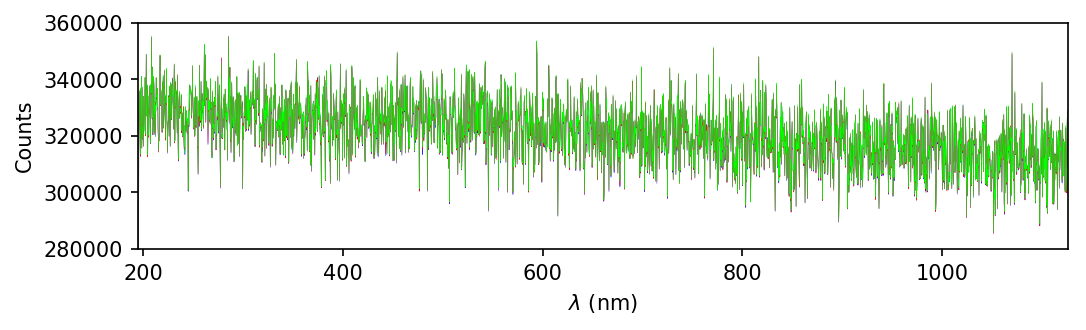

In [7]:
background0 = integrate_dataset(1906050011)
background1 = integrate_dataset(1906050014)
background2 = integrate_dataset(1906050020)
background = (background1+background2)/2
plot_spectrum(background0, background1, background2, ylim=(280000, 360000))

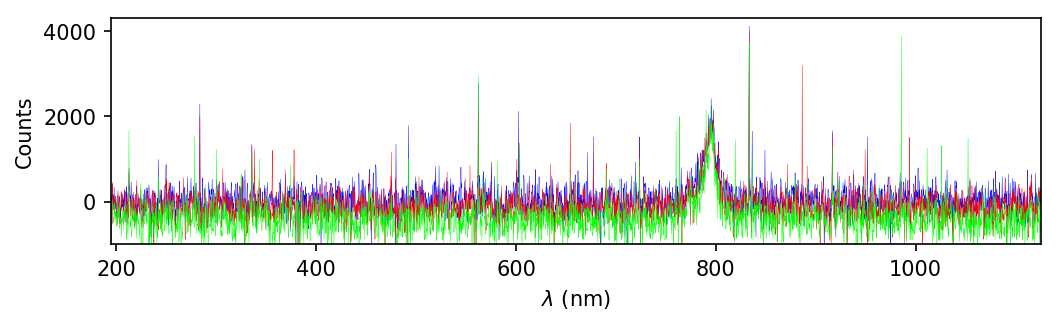

In [8]:
# Strange 1e15 dataset before removing beam block and retaking background
set1 = integrate_dataset(1906050012)
plot_spectrum(set1-background0, set1-background1, set1-background2)
# I think the conclusion might be that the signal was a bit too small

In [9]:
densities = np.array([1.25e15, 2.5e15, 7.5e15, 1e16, 2.5e16, 5e16, 7.5e16, 1e17, 1.5e17, 2.5e17, 5e17])
intensity = np.zeros((len(densities), N))
intensity[0] = adjust(integrate_dataset(1906050015), background, 0, 800)
intensity[1] = adjust(integrate_dataset(1906050016), background, 0, 800)
intensity[2] = adjust(integrate_dataset(1906050017), background, 0, 800)
intensity[3] = adjust(integrate_dataset(1906050018), background, 0, 800)
intensity[4] = adjust(integrate_dataset(1906050019), background, 0, 800)
intensity[5] = adjust(integrate_dataset(1906050021), background, 0, 800)
intensity[6] = adjust(integrate_dataset(1906050022), background, 0, 800)
intensity[7] = adjust(integrate_dataset(1906050023), background, 0, 800)
intensity[8] = adjust(integrate_dataset(1906050024), background, 0, 800)
intensity[9] = adjust(integrate_dataset(1906050025), background, 0, 800)
intensity[10] = adjust(integrate_dataset(1906050027), background, 0, 800)

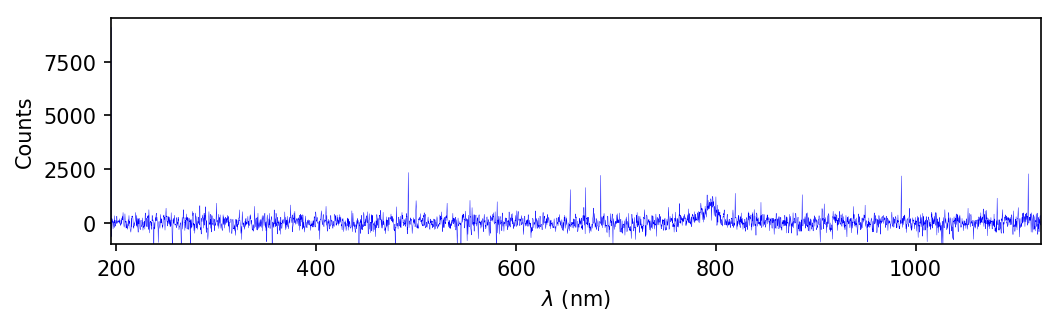

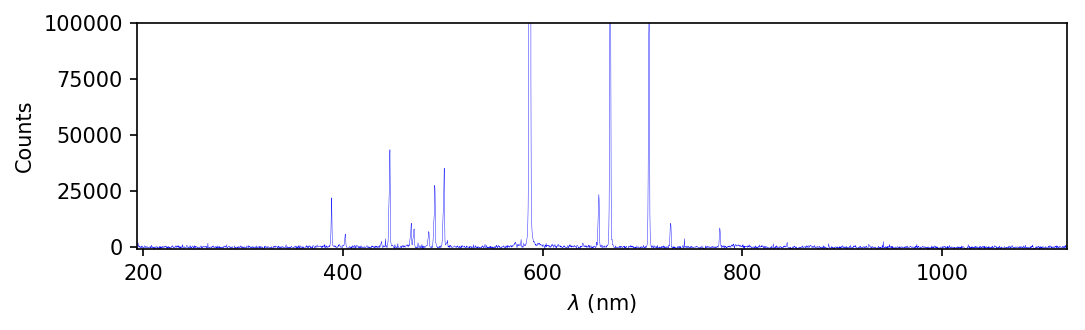

In [10]:
plot_spectrum(intensity[0])
plot_spectrum(intensity[10], ylim=(-1000, 1e5))

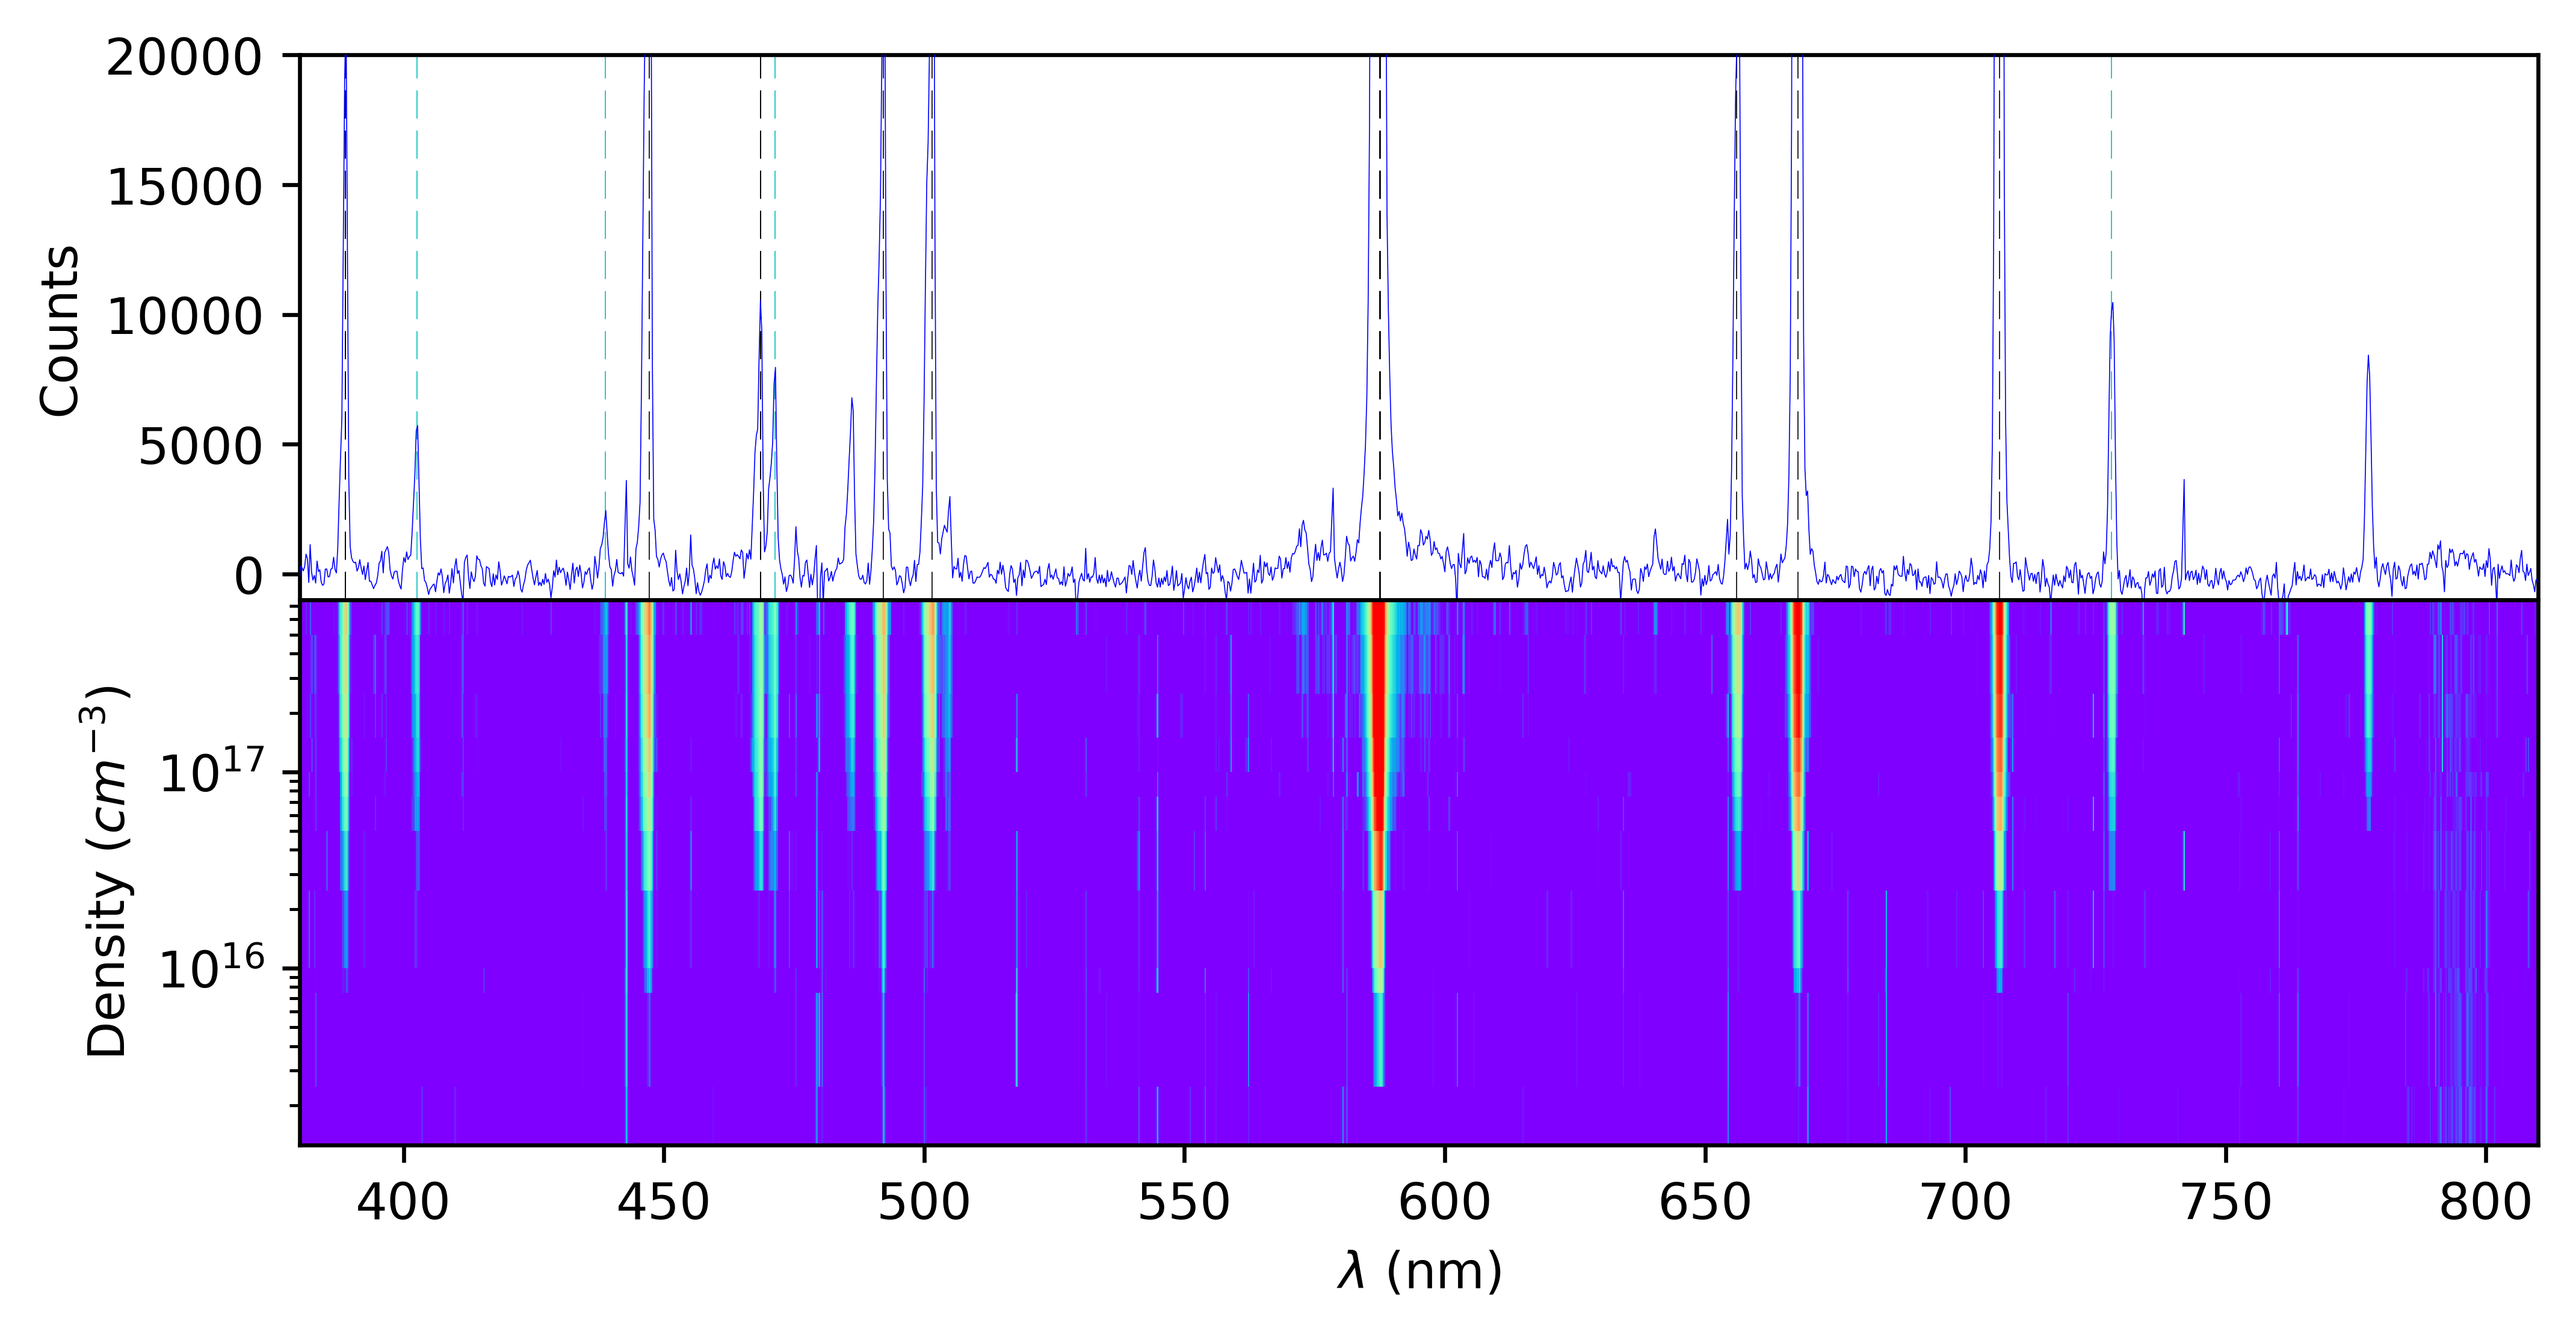

In [13]:
# Make heat map here
fig = plt.figure(figsize=(8, 4), dpi=600)
ax = plt.subplot(211)
color_set = [plt.cm.brg(i) for i in np.linspace(0, 1, 1)]
ax.set_prop_cycle('color', color_set)
plt.plot(l, intensity[10], linewidth=0.2, zorder=10)
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('Counts')
ylim = [-1000, 20000]
plt.ylim(ylim)
for i in range(len(lines_c)):
    line = lines_c[i]
    plt.plot([line, line], [ylim[0], ylim[1]], 'k--', linewidth=0.2, zorder=0)
    
for i in range(len(lines_w)):
    line = lines_w[i]
    plt.plot([line, line], [ylim[0], ylim[1]], 'c--', linewidth=0.2, zorder=0)
            
norm = colors.LogNorm(vmin=6e2, vmax=1e5)
plt.subplot(212, sharex=ax)
extent = [l[0], l[-1], densities[-1], densities[0]]
X,Y = np.meshgrid(l, np.append(densities, 7.5e17))
plt.pcolor(X, Y, abs(intensity), norm=norm, cmap='rainbow')
plt.yscale('log')
plt.ylabel(r'Density ($cm^{-3}$)')
plt.xlim(380, 810)
plt.xlabel('$\lambda$ (nm)')
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
plt.show()

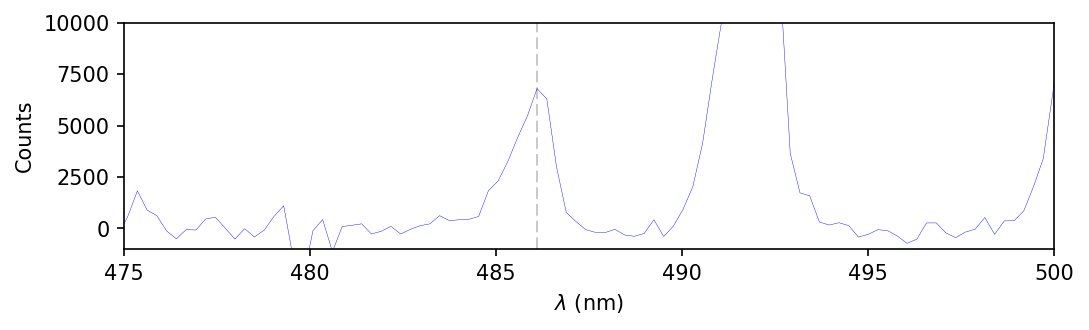

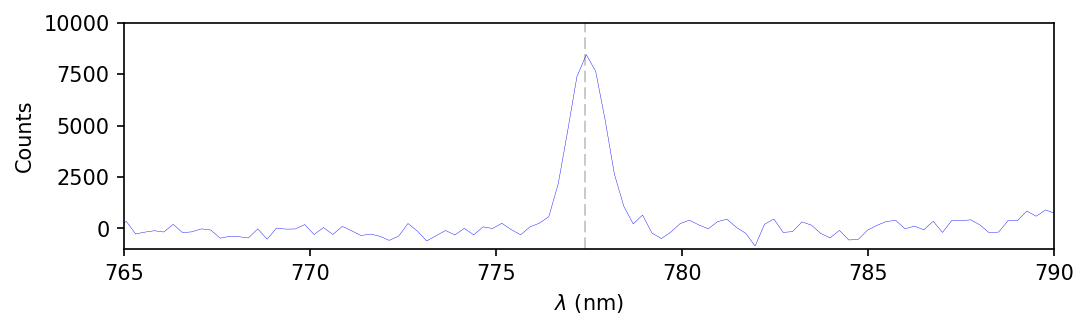

In [26]:
# First unknown line is at around 486.1, which is a Hydrogen line
plot_spectrum(intensity[10], ylim=(-1000, 1e4), xlim=(475, 500), lines=[486.1])
# Second unknown line is at 777.4, which is an oxygen line
plot_spectrum(intensity[10], ylim=(-1000, 1e4), xlim=(765, 790), lines=[777.4])
# There is almost for sure some water contamination, seems to come in through the Helium line